# Project of Data Exploration and Visualisation (Exercise 1)

Made by Gaspard Langlais (K-8331)

## (A) Generate synthetic data

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

def generate_tagged_data(n_samples, n_features, n_informative, n_redundant, n_repeated, n_classes, random_state=None):
    X, y = make_classification(
        n_samples=n_samples,        # Number of samples
        n_features=n_features,         # Total number of features
        n_informative=n_informative,       # Actually relevant features
        n_redundant=n_redundant,         # Redundant features (linear combinations)
        n_repeated=n_repeated,          # Repeated features (duplicates)
        n_classes=n_classes,           # Binary classification
        n_clusters_per_class=2,# Clusters per class
        weights=[0.5, 0.5],    # Balanced classes
        flip_y=0.05,           # Label noise (5%)
        random_state=random_state, # Block the alea
        shuffle=False # Don't change the order of the datas
    )

    # Tag each feature according to its type
    feature_types = ['informative'] * n_informative + \
                    ['redundant'] * n_redundant + \
                    ['repeated'] * n_repeated + \
                    ['noise'] * (n_features - n_informative - n_redundant - n_repeated)
    return X, y, feature_types

X, y, feature_types = generate_tagged_data(1000, 30, 5, 5, 2, 2)

### Quick Data Exploration

In [2]:
from IPython.display import display

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

display(df.head()) # First line of the dataset
display(df.describe()) # Important datas of the dataset

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,target
0,-1.209517,-0.814899,-0.147322,-4.349063,-0.692011,-5.347343,0.133825,1.667028,1.111734,-1.759661,...,2.534366,-2.592640,-0.827864,0.284346,1.338258,1.052389,-0.578887,0.247539,0.015224,0
1,0.668787,-0.960722,1.355210,-0.738550,-1.843524,-2.579894,3.119414,0.184582,-2.382832,-0.714012,...,0.828465,1.369886,0.673460,-1.034321,-0.000475,1.103124,0.573840,-0.153498,-0.404775,0
2,-0.287540,0.516593,2.117279,-0.718538,-1.116592,-1.997202,1.684338,-0.922886,-2.457748,-1.258632,...,0.711391,0.443430,-0.219703,0.074180,0.796011,0.954402,-0.246010,-0.471388,-0.439830,0
3,-0.778622,-1.034300,1.210819,0.398650,-1.290552,-2.562696,2.257985,0.504883,-1.110816,-1.258764,...,0.933377,0.592352,1.158472,0.463045,1.186677,-1.350417,-0.134801,0.150840,-2.107345,0
4,-2.620335,1.607050,0.710260,-2.550438,-0.165967,-3.319222,-1.771753,-0.404208,0.250989,-2.498010,...,-0.543504,-1.696212,-0.049326,-1.832388,-0.640517,0.491299,-0.159527,1.433429,-0.795611,0


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.446710,-0.986111,1.044764,-0.009414,0.413200,-1.182136,0.957325,0.608360,0.520013,-0.283931,...,-0.030000,0.022189,-0.000036,0.009769,0.023016,-0.045361,-0.035663,-0.028946,-0.032301,0.505000
std,1.722421,1.298418,1.332304,1.651958,1.633197,2.484550,1.897743,1.300996,2.274397,1.405490,...,0.973470,1.011251,0.992902,0.995260,0.976731,0.973442,0.960139,0.990496,1.009488,0.500225
min,-5.566473,-5.195622,-3.551330,-5.479986,-3.508022,-8.131134,-5.238429,-5.542494,-6.745329,-5.415343,...,-3.587228,-3.524688,-3.272441,-3.123690,-3.349386,-3.425030,-3.059313,-2.967404,-3.902225,0.000000
25%,-1.618937,-1.786717,0.202785,-1.117113,-0.795454,-2.951141,-0.212329,0.038547,-0.866771,-1.316279,...,-0.682342,-0.660238,-0.652351,-0.619239,-0.609864,-0.698918,-0.649609,-0.674016,-0.698607,0.000000
50%,-0.573469,-1.034478,1.025595,-0.012451,0.237936,-1.365266,0.983825,0.797814,0.600290,-0.478288,...,-0.022211,0.092215,0.023839,-0.019362,0.035510,0.001282,-0.022246,-0.028716,-0.004958,1.000000
75%,0.675776,-0.167451,1.886644,1.220920,1.611190,0.366754,2.147993,1.187705,2.059162,0.758453,...,0.620597,0.671311,0.642705,0.715004,0.698928,0.616789,0.639710,0.620084,0.660686,1.000000
max,5.656021,3.957930,5.679908,4.730230,6.464774,7.997044,6.950351,5.442975,7.081256,3.770769,...,3.814431,3.116442,2.797247,2.689012,2.749863,2.828706,2.957609,2.976266,2.956151,1.000000


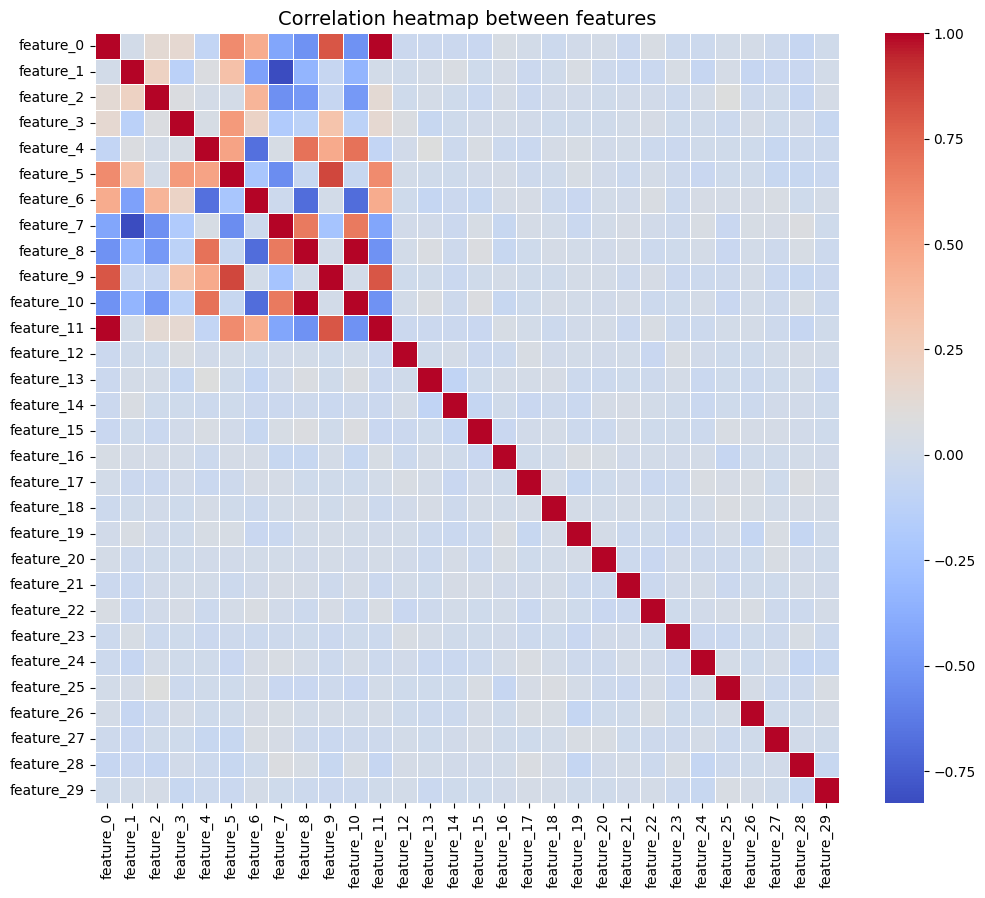

In [3]:
# Correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.drop(columns='target').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation heatmap between features", fontsize=14)
plt.show()

#### Verify class balancy

In [4]:
df['target'].value_counts(normalize=True)

target
1    0.505
0    0.495
Name: proportion, dtype: float64

## (B) Evaluate feature selection methods

### Metrics for feature selection

#### Suc Metrics

In [5]:
# Function to calculate Suc score
def calculate_suc_score(selected, relevant_idx, total_features, alpha=None):
    Rt = len(relevant_idx)
    It = total_features - Rt
    Rs = len(set(selected) & set(relevant_idx))
    Is = len(set(selected) - set(relevant_idx))
    alpha = min(0.5, Rt / It) if alpha is None else alpha
    return ((Rs / Rt) - alpha * (Is / It)) * 100

#### Custom metrics with soft weighting of feature types

In [6]:
# Help to know the impact of the differement feature type
def soft_score(selected, feature_types, weights={'informative': 1.0, 'redundant': 0.5, 'repeated': 0.25, 'noise': -1.0}):
    if len(selected) == 0:
        return 0
    return np.mean([weights.get(feature_types[i], -1.0) for i in selected])

#### Custom metrics F1 - like

In [7]:
def feature_selection_f1_score(selected, relevant_idx):
    selected_set = set(selected)
    relevant_set = set(relevant_idx)
    Rs = len(selected_set & relevant_set)
    Is = len(selected_set - relevant_set)
    precision = Rs / (Rs + Is) if (Rs + Is) > 0 else 0
    recall = Rs / len(relevant_set) if len(relevant_set) > 0 else 0
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

#### Repeat of the experiment

In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def run_feature_selection_evaluation(n_runs, k):
    results = {'Run': [], 'Method': [], 'Selected Features': [], 'Correctly Selected': [],
               'Suc': [], 'F1-like': [], 'Soft': []}

    for seed in range(n_runs):
        X, y, feature_types = generate_tagged_data(1000, 30, 5, 5, 2, 2, random_state=seed) #Generation of the dataset 
        relevant_idx = [i for i, t in enumerate(feature_types) if t == 'informative']
        total_feat = X.shape[1]

        X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, random_state=seed)

        methods = {}

        # Mutual Information (filter)
        selector_mi = SelectKBest(score_func=mutual_info_classif, k=k) #k = Number of selected features
        selector_mi.fit(X_train, y_train)
        methods["Mutual Information"] = selector_mi.get_support(indices=True)

        # RFE (wrapper)
        selector_rfe = RFE(estimator=SVC(kernel="linear"), n_features_to_select=k)
        selector_rfe.fit(X_train, y_train)
        methods["RFE (SVM)"] = np.where(selector_rfe.support_)[0]

        # Random Forest (embedded)
        rf = RandomForestClassifier(random_state=seed)
        rf.fit(X_train, y_train)
        topk = np.argsort(rf.feature_importances_)[-k:]  
        methods["Random Forest"] = topk

        for method, selected in methods.items():
            selected_set = sorted(int(i) for i in selected)
            correct_set = sorted(set(selected_set) & set(relevant_idx))

            results["Run"].append(seed + 1)
            results["Method"].append(method)
            results["Selected Features"].append(selected_set)
            results["Correctly Selected"].append(correct_set)
            results["Suc"].append(calculate_suc_score(selected, relevant_idx, total_feat))
            results["F1-like"].append(feature_selection_f1_score(selected, relevant_idx))
            results["Soft"].append(soft_score(selected, feature_types))

    df_results = pd.DataFrame(results)
    return df_results

In [9]:
# Raw table
df_results = run_feature_selection_evaluation(n_runs=5, k=10)
display(df_results)

# Aggregated table (mean)
df_summary = df_results.groupby("Method")[["Suc", "F1-like", "Soft"]].mean().reset_index()
display(df_summary)

,Run,Method,Selected Features,Correctly Selected,Suc,F1-like,Soft
0,1,Mutual Information,"[0, 1, 2, 4, 5, 6, 8, 10, 11, 14]","[0, 1, 2, 4]",75.2,0.533333,0.500
1,1,RFE (SVM),"[0, 1, 2, 5, 6, 7, 11, 15, 27, 29]","[0, 1, 2]",54.4,0.400000,0.175
2,1,Random Forest,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 11]","[0, 1, 2]",54.4,0.400000,0.600
3,2,Mutual Information,"[0, 1, 2, 5, 6, 7, 8, 10, 11, 19]","[0, 1, 2]",54.4,0.400000,0.450
4,2,RFE (SVM),"[0, 2, 3, 4, 5, 8, 9, 11, 19, 21]","[0, 2, 3, 4]",75.2,0.533333,0.375
5,2,Random Forest,"[0, 1, 2, 4, 5, 6, 8, 9, 10, 11]","[0, 1, 2, 4]",75.2,0.533333,0.650
6,3,Mutual Information,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11]","[0, 1, 2, 3, 4]",96.0,0.666667,0.700
7,3,RFE (SVM),"[0, 1, 2, 3, 5, 8, 10, 11, 26, 27]","[0, 1, 2, 3]",75.2,0.533333,0.350
8,3,Random Forest,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11]","[0, 1, 2, 3, 4]",96.0,0.666667,0.700
9,4,Mutual Information,"[1, 2, 3, 5, 6, 7, 8, 9, 27, 28]","[1, 2, 3]",54.4,0.400000,0.350


,Method,Suc,F1-like,Soft
0,Mutual Information,66.88,0.480000,0.490
1,RFE (SVM),71.04,0.506667,0.385
2,Random Forest,79.36,0.560000,0.670


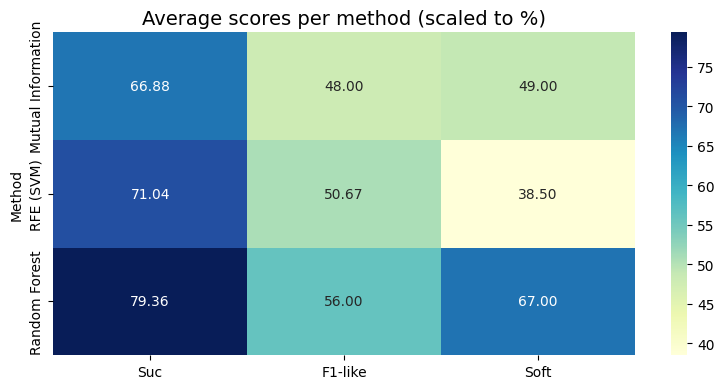

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scale F1-like and Soft scores to match Suc (0–100)
df_plot = df_results.copy()
df_plot["F1-like"] = df_plot["F1-like"] * 100
df_plot["Soft"] = df_plot["Soft"] * 100

# Melt for barplot (15 runs per method)
df_melted = df_plot.melt(id_vars=["Run", "Method"], value_vars=["Suc", "F1-like", "Soft"],
                         var_name="Metric", value_name="Score")

# HEATMAP with means
df_summary_scaled = df_plot.groupby("Method")[["Suc", "F1-like", "Soft"]].mean().reset_index()
df_heatmap = df_summary_scaled.set_index("Method")

plt.figure(figsize=(8, 4))
sns.heatmap(df_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Average scores per method (scaled to %)", fontsize=14)
plt.ylabel("Method")
plt.tight_layout()
plt.show()

## (C) Evaluate classification results

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

#### Evaluation of the differents methods

In [12]:
def evaluate_all_views(X, y, y_name="Full Set", k=10, random_state=42):
    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    views = {}

    # All of the features
    views["All Features"] = (X_train, X_test)

    # Informativ only
    X_train_relevant = X_train[:, relevant_idx]
    X_test_relevant = X_test[:, relevant_idx]
    views["Relevant Only"] = (X_train_relevant, X_test_relevant)

    # Feature selection : MI
    sel_mi = SelectKBest(mutual_info_classif, k=k).fit(X_train, y_train)
    idx_mi = sel_mi.get_support(indices=True)
    views["Selected - MI"] = (X_train[:, idx_mi], X_test[:, idx_mi])

    # Feature selection : RFE (SVM)
    sel_rfe = RFE(SVC(kernel="linear"), n_features_to_select=k).fit(X_train, y_train)
    idx_rfe = np.where(sel_rfe.support_)[0]
    views["Selected - RFE"] = (X_train[:, idx_rfe], X_test[:, idx_rfe])

    # Feature selection : RF Importance
    rf = RandomForestClassifier(random_state=random_state).fit(X_train, y_train)
    idx_rf = np.argsort(rf.feature_importances_)[-k:]
    views["Selected - RF"] = (X_train[:, idx_rf], X_test[:, idx_rf])

    # PCA
    X_train_pca = PCA(n_components=2).fit_transform(X_train)
    X_test_pca = PCA(n_components=2).fit(X_train).transform(X_test)
    views["PCA (2D)"] = (X_train_pca, X_test_pca)

    # MDS
    X_train_mds = MDS(n_components=2, random_state=random_state).fit_transform(X_train)
    X_test_mds = MDS(n_components=2, random_state=random_state).fit_transform(X_test)
    views["MDS (2D)"] = (X_train_mds, X_test_mds)

    # t-SNE
    X_train_tsne = TSNE(n_components=2, random_state=random_state).fit_transform(X_train)
    X_test_tsne = TSNE(n_components=2, random_state=random_state).fit_transform(X_test)
    views["t-SNE (2D)"] = (X_train_tsne, X_test_tsne)

    results = []

    for view_name, (Xtr, Xte) in views.items():
        for model_name, model in {
            "SVM": SVC(),
            "Random Forest": RandomForestClassifier()
        }.items():
            model.fit(Xtr, y_train)
            y_pred = model.predict(Xte)

            results.append({
                "View": view_name,
                "Classifier": model_name,
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "F1 Score": f1_score(y_test, y_pred)
            })

    return pd.DataFrame(results)

#### Repeating the tests

In [20]:
all_results = []
nb_datasets = 5
K = 10 # Number of selected features

for seed in range(nb_datasets):  # we test on a different dataset then we do the mean
    X, y, feature_types = generate_tagged_data(1000, 30, 5, 5, 2, 2, random_state=seed)
    relevant_idx = [i for i, t in enumerate(feature_types) if t == 'informative']
    
    df_one_run = evaluate_all_views(X, y, k=K, random_state=seed)
    all_results.append(df_one_run)
    print(f"Dataset {seed + 1} finished")

# Concat of the results
df_concat = pd.concat(all_results, ignore_index=True)

# Mean by view and classifier
df_mean = df_concat.groupby(["View", "Classifier"]).mean().round(4).reset_index()
df_mean

Dataset 1 finished
Dataset 2 finished
Dataset 3 finished
Dataset 4 finished
Dataset 5 finished


,View,Classifier,Accuracy,Precision,Recall,F1 Score
0,All Features,Random Forest,0.9140,0.9108,0.9158,0.9128
1,All Features,SVM,0.9167,0.9150,0.9160,0.9152
2,MDS (2D),Random Forest,0.5940,0.5934,0.5744,0.5830
3,MDS (2D),SVM,0.5960,0.5976,0.5609,0.5773
4,PCA (2D),Random Forest,0.7027,0.7193,0.6641,0.6882
5,PCA (2D),SVM,0.7453,0.7909,0.6687,0.7169
6,Relevant Only,Random Forest,0.9173,0.9217,0.9098,0.9156
7,Relevant Only,SVM,0.9287,0.9220,0.9358,0.9286
8,Selected - MI,Random Forest,0.9240,0.9198,0.9270,0.9233
9,Selected - MI,SVM,0.9220,0.9185,0.9245,0.9213


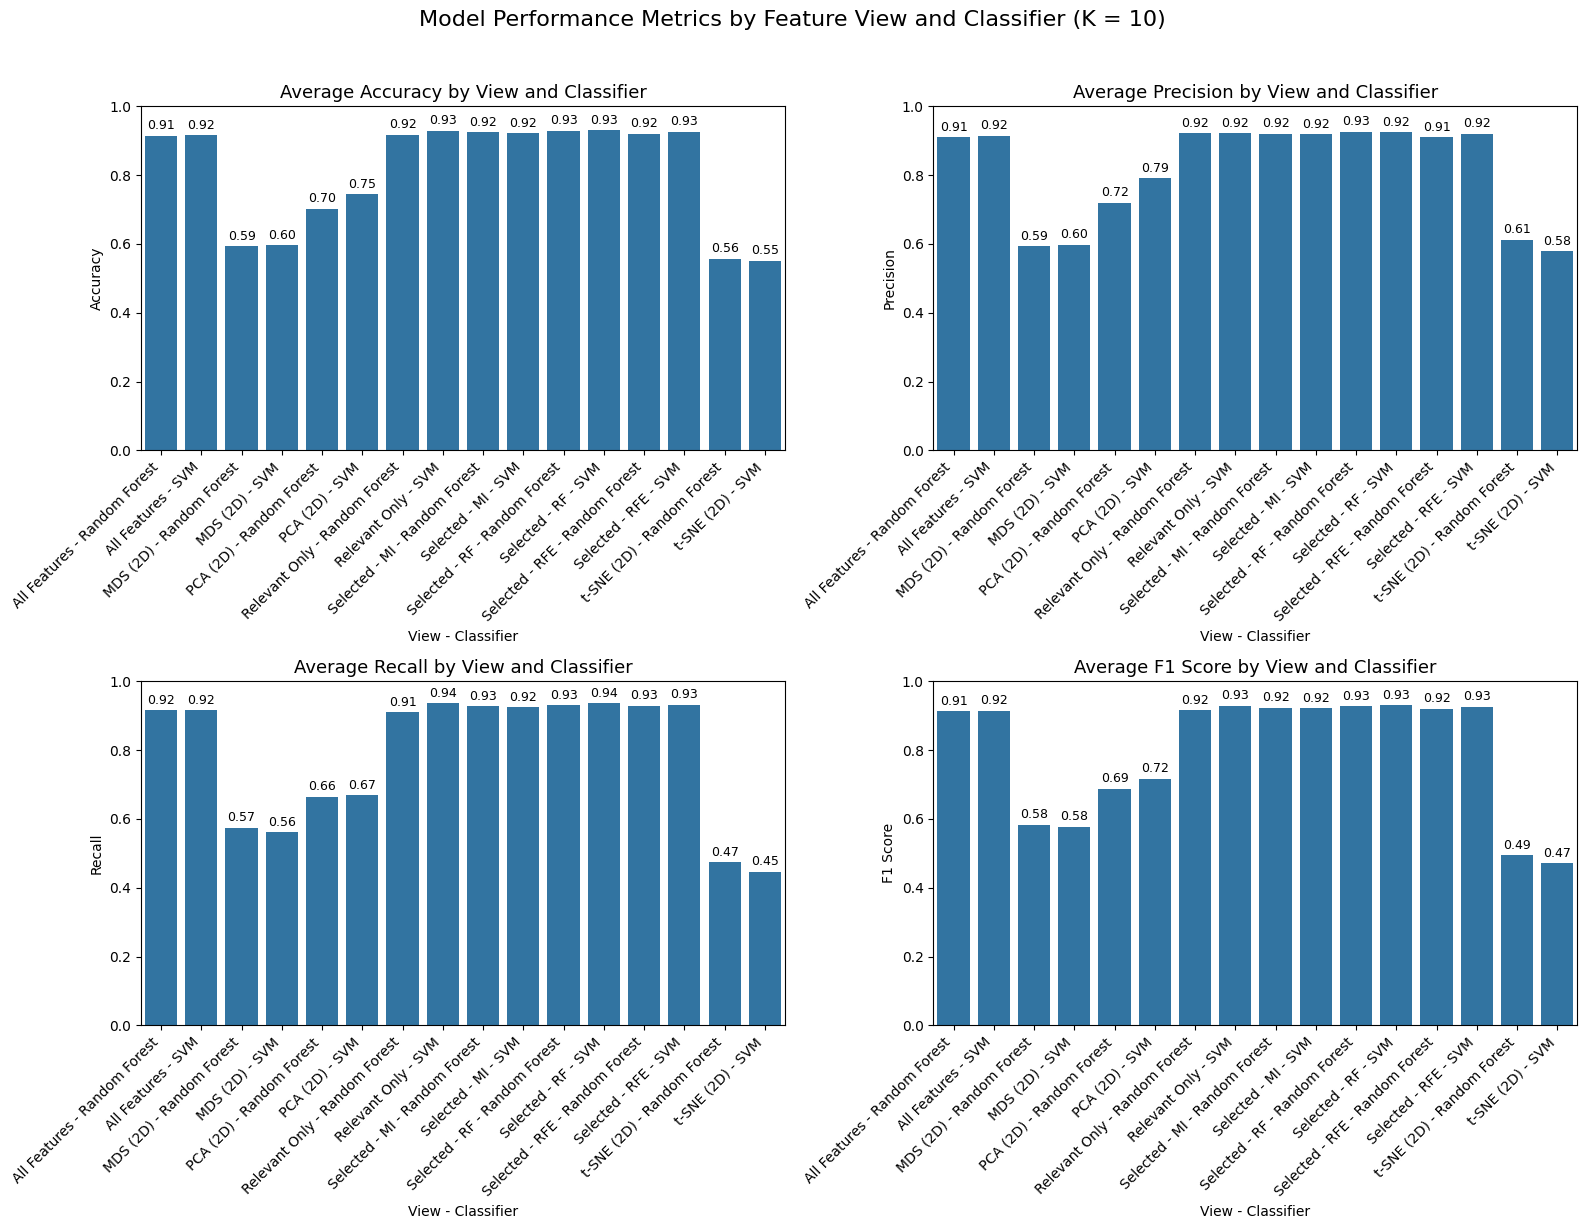

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine View and Classifier into a single label for the x-axis
df_mean["View-Classifier"] = df_mean["View"] + " - " + df_mean["Classifier"]

# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Plot size and layout
plt.figure(figsize=(16, 12))

# Create one subplot per metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.barplot(data=df_mean, x="View-Classifier", y=metric)
    plt.title(f"Average {metric} by View and Classifier", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(metric)
    plt.xlabel("View - Classifier")
    plt.ylim(0, 1)

    # Add values on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.suptitle(f"Model Performance Metrics by Feature View and Classifier (K = {K})", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Il faut tester pour différents K (a la limite 5 et 10 ca suffit) pour le rapport